**We will explore the transition and adoption of diverse payment methods in recent years.**

In [57]:
data1 = pd.read_csv('/Documents/MSBA 2024/BANA 212 Data and Programming Analytics/shopping_trends_updated.csv')

data1.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


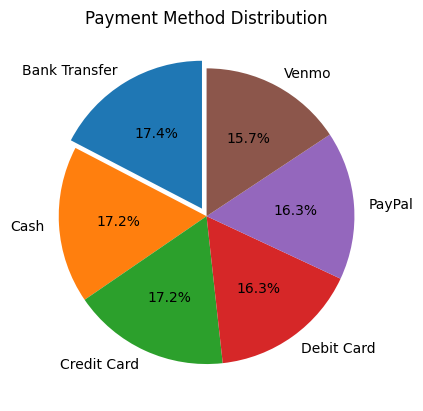

In [52]:
payment_method = sorted(data1['Payment Method'].unique().tolist())

payment_method_count = data1['Payment Method'].value_counts()

explode = (0.06, 0, 0, 0, 0, 0)

plt.pie(payment_method_count, labels=payment_method, explode = explode, autopct='%.1f%%', startangle=90)

plt.title('Payment Method Distribution')
plt.show()

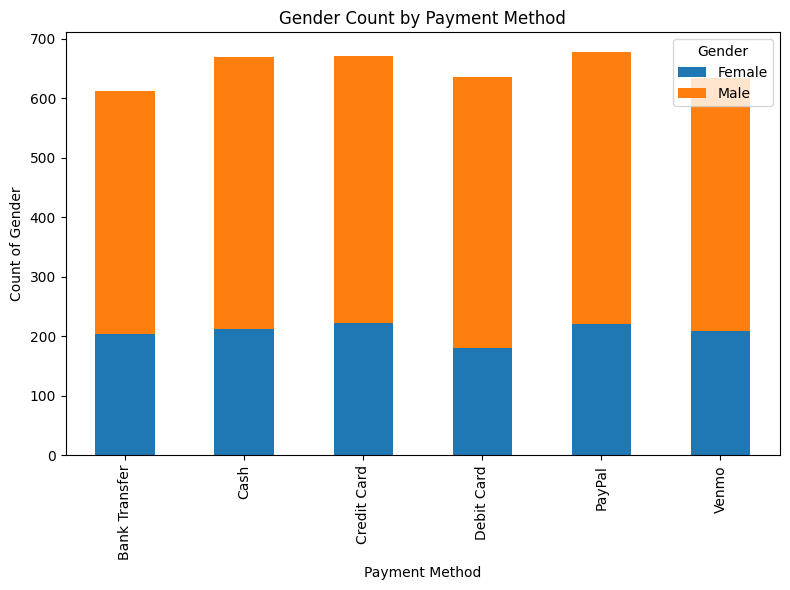

In [53]:
payment_method = sorted(data1['Payment Method'].unique().tolist())
gender = sorted(data1['Gender'].unique().tolist())

payment_method_count = data1.groupby(['Payment Method'])['Gender'].value_counts().unstack().sort_index().fillna(0)

plt.figure(figsize = (8,6))

payment_method_count.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Gender Count by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count of Gender')

plt.legend(gender, title = "Gender")

plt.tight_layout()
plt.show()

In [54]:
data1['Purchase Amount (USD)'].describe()

count    3900.000000
mean       59.764359
std        23.685392
min        20.000000
25%        39.000000
50%        60.000000
75%        81.000000
max       100.000000
Name: Purchase Amount (USD), dtype: float64

NameError: name 'plot_data' is not defined

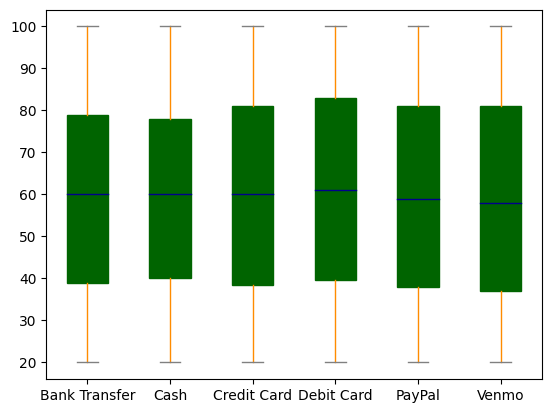

In [55]:
bank_transfer = data1.loc[data1['Payment Method'] == 'Bank Transfer', 'Purchase Amount (USD)']
cash = data1.loc[data1['Payment Method'] == 'Cash', 'Purchase Amount (USD)']
credit_card = data1.loc[data1['Payment Method'] == 'Credit Card', 'Purchase Amount (USD)']
debit_card = data1.loc[data1['Payment Method'] == 'Debit Card', 'Purchase Amount (USD)']
paypal = data1.loc[data1['Payment Method'] == 'PayPal', 'Purchase Amount (USD)']
venmo = data1.loc[data1['Payment Method'] == 'Venmo', 'Purchase Amount (USD)']

Q1 = bank_transfer.quantile(0.25)
Q3 = bank_transfer.quantile(0.75)
IQR = Q3 - Q1
IQR_lower = Q1 - 1.5 * IQR
IQR_upper = Q3 + 1.5 * IQR
IQR_data_bank_transfer = bank_transfer[(bank_transfer >= IQR_lower) & (bank_transfer <= IQR_upper)]

Q1 = cash.quantile(0.25)
Q3 = cash.quantile(0.75)
IQR = Q3 - Q1
IQR_lower = Q1 - 1.5 * IQR
IQR_upper = Q3 + 1.5 * IQR
IQR_data_cash = cash[(cash >= IQR_lower) & (cash <= IQR_upper)]

Q1 = credit_card.quantile(0.25)
Q3 = credit_card.quantile(0.75)
IQR = Q3 - Q1
IQR_lower = Q1 - 1.5 * IQR
IQR_upper = Q3 + 1.5 * IQR
IQR_data_credit = credit_card[(credit_card >= IQR_lower) & (credit_card <= IQR_upper)]

Q1 = debit_card.quantile(0.25)
Q3 = debit_card.quantile(0.75)
IQR = Q3 - Q1
IQR_lower = Q1 - 1.5 * IQR
IQR_upper = Q3 + 1.5 * IQR
IQR_data_debit = debit_card[(debit_card >= IQR_lower) & (debit_card <= IQR_upper)]

Q1 = paypal.quantile(0.25)
Q3 = paypal.quantile(0.75)
IQR = Q3 - Q1
IQR_lower = Q1 - 1.5 * IQR
IQR_upper = Q3 + 1.5 * IQR
IQR_data_paypal = paypal[(paypal >= IQR_lower) & (paypal <= IQR_upper)]

Q1 = venmo.quantile(0.25)
Q3 = venmo.quantile(0.75)
IQR = Q3 - Q1
IQR_lower = Q1 - 1.5 * IQR
IQR_upper = Q3 + 1.5 * IQR
IQR_data_venmo = venmo[(venmo >= IQR_lower) & (venmo <= IQR_upper)]

color_dict = {
    'boxes': 'DarkGreen',
    'whiskers': 'DarkOrange',
    'medians': 'DarkBlue',
    'caps': 'Gray',
}

#payment = df.DataFrame['Bank Transfer', 'Cash', 'Credit Card', 'Debit Card', 'PayPal', 'Venmo']
data1 = pd.DataFrame({
    'Bank Transfer': IQR_data_bank_transfer,
    'Cash': IQR_data_cash,
    'Credit Card': IQR_data_credit,
    'Debit Card': IQR_data_debit,
    'PayPal': IQR_data_paypal,
    'Venmo':IQR_data_venmo
})
#plot_data = [IQR_data_bank_transfer, IQR_data_cash, IQR_data_credit, IQR_data_debit, IQR_data_paypal, IQR_data_venmo]
data1.plot(kind='box', color=color_dict, patch_artist=True)

plt.boxplot(plot_data, labels = payment)
plt.title('Purchase Amount (USD)')
plt.ylabel('Amount in Dollars')

plt.grid(axis = 'y')

plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

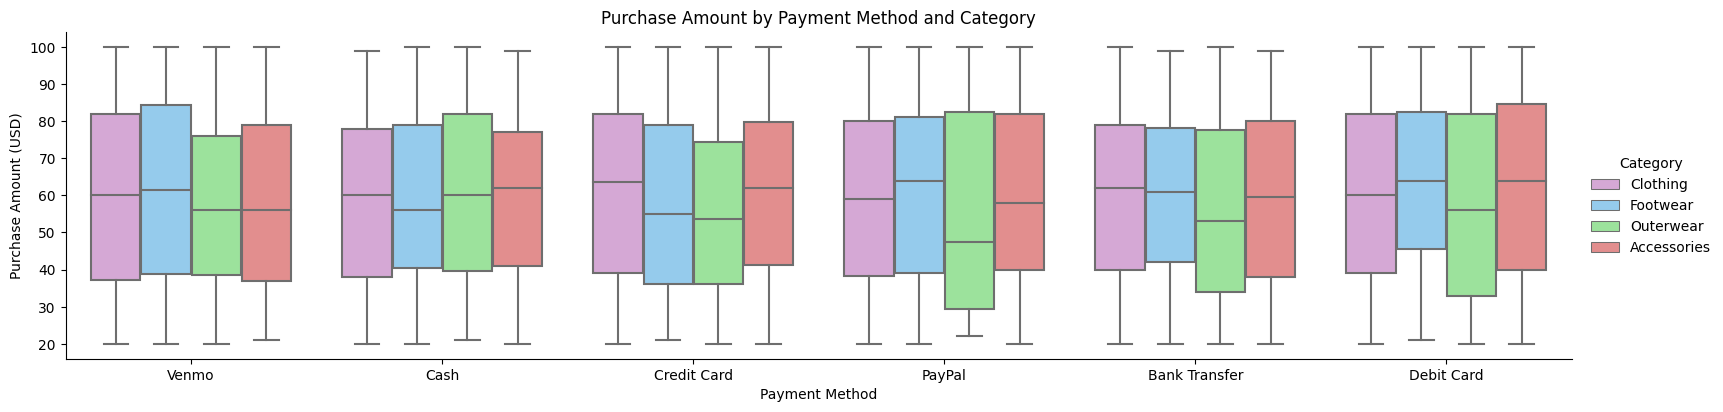

In [58]:
colors = ['plum', 'lightskyblue', 'lightgreen', 'lightcoral']

sns.catplot(
    data=data1, x='Payment Method', y='Purchase Amount (USD)', hue='Category', kind='box',
    col=None, aspect=4, height=4, palette=colors
)

plt.xlabel('Payment Method')
plt.ylabel('Purchase Amount (USD)')
plt.title('Purchase Amount by Payment Method and Category')
plt.show()

**Exploratory Analysis**

In [60]:
data2 = pd.read_csv('/Users/hawkdayeh/Documents/MSBA 2024/BANA 212 Data and Programming Analytics/shopping_trends_updated_cluster.csv')


In [22]:
import matplotlib.pyplot as plt

def print_cols(data, time_str):
    ### Print column names, BEFORE the encdoing
    columns_list = data.columns.tolist()
    print(f'Columns List {time_str} Encoding:')
    print(" ")
    for i, col in enumerate(columns_list):
        print(f'{i+1}. {col}')
    return columns_list


def print_change(before_cols, after_cols):
    # Print the dropped columns
    dropped_columns = [col for col in before_cols if col not in after_cols]
    print(f'Dropped Columns')
    print(' ')
    for i, col in enumerate(dropped_columns):
        print(f'{i+1}. {col}')
    print('-' * 40)
    print(' ')
    print(' ')
    print(' ')

    # Print the added columns
    added_columns = [col for col in after_cols if col not in before_cols]
    print(f'Added Columns')
    print(' ')
    for i, col in enumerate(added_columns):
        print(f'{i+1}. {col}')

def draw_elbow_plot(x, y):
    plt.figure(figsize=(10,6))
    plt.plot(x, y, marker='o', linestyle='--')
    plt.title('Elbow Curve')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

In [61]:
data2.columns

Index(['Customer ID', 'Age', 'Gender', 'Category', 'Purchase Amount (USD)',
       'Location', 'Season', 'Review Rating', 'Subscription Status',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [62]:
missing_values = data2.isnull().sum()
missing_values

Customer ID               0
Age                       0
Gender                    0
Category                  0
Purchase Amount (USD)     0
Location                  0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [63]:
# To preserve the original data, so we can perform visualization on the actual data
clustering_data = data2.copy()

In [64]:
columns_list_before = print_cols(data2, 'Before')

Columns List Before Encoding:
 
1. Customer ID
2. Age
3. Gender
4. Category
5. Purchase Amount (USD)
6. Location
7. Season
8. Review Rating
9. Subscription Status
10. Shipping Type
11. Discount Applied
12. Promo Code Used
13. Previous Purchases
14. Payment Method
15. Frequency of Purchases


In [67]:
categorical_cols = ['Gender', 'Category', 'Location', 'Season', 'Shipping Type', 'Payment Method', 'Frequency of Purchases']

clustering_data2 = pd.get_dummies(data2, columns=categorical_cols)

In [68]:
clustering_data2.head(10)

,Customer ID,Age,Purchase Amount (USD),Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Gender_Female,Gender_Male,...,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,1,55,53,3.1,True,True,True,14,False,True,...,False,False,True,False,False,False,True,False,False,False
1,2,19,64,3.1,True,True,True,2,False,True,...,False,False,False,False,False,False,True,False,False,False
2,3,50,73,3.1,True,True,True,23,False,True,...,False,False,False,False,False,False,False,False,False,True
3,4,21,90,3.5,True,True,True,49,False,True,...,False,True,False,False,False,False,False,False,False,True
4,5,45,49,2.7,True,True,True,31,False,True,...,False,True,False,True,False,False,False,False,False,False
5,6,46,20,2.9,True,True,True,14,False,True,...,False,False,True,False,False,False,False,False,False,True
6,7,63,85,3.2,True,True,True,49,False,True,...,False,False,False,False,False,False,False,False,True,False
7,8,27,34,3.2,True,True,True,19,False,True,...,False,False,False,False,False,False,False,False,False,True
8,9,26,97,2.6,True,True,True,8,False,True,...,False,False,True,True,False,False,False,False,False,False
9,10,57,31,4.8,True,True,True,4,False,True,...,False,False,False,False,False,False,False,False,True,False


In [69]:
from sklearn.preprocessing import MinMaxScaler

continuous_cols = [
    "Age",
    "Purchase Amount (USD)",
    "Review Rating",
    "Previous Purchases"
]


scaler = MinMaxScaler()

continuous_data = scaler.fit_transform(clustering_data[continuous_cols])

clustering_data2[continuous_cols] = pd.DataFrame(continuous_data, columns=continuous_cols)

clustering_data2.head(10)

,Customer ID,Age,Purchase Amount (USD),Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Gender_Female,Gender_Male,...,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,1,0.711538,0.4125,0.24,True,True,True,0.265306,False,True,...,False,False,True,False,False,False,True,False,False,False
1,2,0.019231,0.5500,0.24,True,True,True,0.020408,False,True,...,False,False,False,False,False,False,True,False,False,False
2,3,0.615385,0.6625,0.24,True,True,True,0.448980,False,True,...,False,False,False,False,False,False,False,False,False,True
3,4,0.057692,0.8750,0.40,True,True,True,0.979592,False,True,...,False,True,False,False,False,False,False,False,False,True
4,5,0.519231,0.3625,0.08,True,True,True,0.612245,False,True,...,False,True,False,True,False,False,False,False,False,False
5,6,0.538462,0.0000,0.16,True,True,True,0.265306,False,True,...,False,False,True,False,False,False,False,False,False,True
6,7,0.865385,0.8125,0.28,True,True,True,0.979592,False,True,...,False,False,False,False,False,False,False,False,True,False
7,8,0.173077,0.1750,0.28,True,True,True,0.367347,False,True,...,False,False,False,False,False,False,False,False,False,True
8,9,0.153846,0.9625,0.04,True,True,True,0.142857,False,True,...,False,False,True,True,False,False,False,False,False,False
9,10,0.750000,0.1375,0.92,True,True,True,0.061224,False,True,...,False,False,False,False,False,False,False,False,True,False


In [70]:
clustering_data['Subscription Status'] = data2['Subscription Status'].astype('category').cat.codes
clustering_data['Discount Applied'] = data2['Discount Applied'].astype('category').cat.codes
clustering_data['Promo Code Used'] = data2['Promo Code Used'].astype('category').cat.codes

In [71]:
columns_list_after = print_cols(clustering_data2, 'After')

Columns List After Encoding:
 
1. Customer ID
2. Age
3. Purchase Amount (USD)
4. Review Rating
5. Subscription Status
6. Discount Applied
7. Promo Code Used
8. Previous Purchases
9. Gender_Female
10. Gender_Male
11. Category_Accessories
12. Category_Clothing
13. Category_Footwear
14. Category_Outerwear
15. Location_Alabama
16. Location_Alaska
17. Location_Arizona
18. Location_Arkansas
19. Location_California
20. Location_Colorado
21. Location_Connecticut
22. Location_Delaware
23. Location_Florida
24. Location_Georgia
25. Location_Hawaii
26. Location_Idaho
27. Location_Illinois
28. Location_Indiana
29. Location_Iowa
30. Location_Kansas
31. Location_Kentucky
32. Location_Louisiana
33. Location_Maine
34. Location_Maryland
35. Location_Massachusetts
36. Location_Michigan
37. Location_Minnesota
38. Location_Mississippi
39. Location_Missouri
40. Location_Montana
41. Location_Nebraska
42. Location_Nevada
43. Location_New Hampshire
44. Location_New Jersey
45. Location_New Mexico
46. Location_N

In [72]:
print_change(columns_list_before, columns_list_after)

Dropped Columns
 
1. Gender
2. Category
3. Location
4. Season
5. Shipping Type
6. Payment Method
7. Frequency of Purchases
----------------------------------------
 
 
 
Added Columns
 
1. Gender_Female
2. Gender_Male
3. Category_Accessories
4. Category_Clothing
5. Category_Footwear
6. Category_Outerwear
7. Location_Alabama
8. Location_Alaska
9. Location_Arizona
10. Location_Arkansas
11. Location_California
12. Location_Colorado
13. Location_Connecticut
14. Location_Delaware
15. Location_Florida
16. Location_Georgia
17. Location_Hawaii
18. Location_Idaho
19. Location_Illinois
20. Location_Indiana
21. Location_Iowa
22. Location_Kansas
23. Location_Kentucky
24. Location_Louisiana
25. Location_Maine
26. Location_Maryland
27. Location_Massachusetts
28. Location_Michigan
29. Location_Minnesota
30. Location_Mississippi
31. Location_Missouri
32. Location_Montana
33. Location_Nebraska
34. Location_Nevada
35. Location_New Hampshire
36. Location_New Jersey
37. Location_New Mexico
38. Location_Ne

In [73]:
clustering_data2.head(10)

,Customer ID,Age,Purchase Amount (USD),Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Gender_Female,Gender_Male,...,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,1,0.711538,0.4125,0.24,True,True,True,0.265306,False,True,...,False,False,True,False,False,False,True,False,False,False
1,2,0.019231,0.5500,0.24,True,True,True,0.020408,False,True,...,False,False,False,False,False,False,True,False,False,False
2,3,0.615385,0.6625,0.24,True,True,True,0.448980,False,True,...,False,False,False,False,False,False,False,False,False,True
3,4,0.057692,0.8750,0.40,True,True,True,0.979592,False,True,...,False,True,False,False,False,False,False,False,False,True
4,5,0.519231,0.3625,0.08,True,True,True,0.612245,False,True,...,False,True,False,True,False,False,False,False,False,False
5,6,0.538462,0.0000,0.16,True,True,True,0.265306,False,True,...,False,False,True,False,False,False,False,False,False,True
6,7,0.865385,0.8125,0.28,True,True,True,0.979592,False,True,...,False,False,False,False,False,False,False,False,True,False
7,8,0.173077,0.1750,0.28,True,True,True,0.367347,False,True,...,False,False,False,False,False,False,False,False,False,True
8,9,0.153846,0.9625,0.04,True,True,True,0.142857,False,True,...,False,False,True,True,False,False,False,False,False,False
9,10,0.750000,0.1375,0.92,True,True,True,0.061224,False,True,...,False,False,False,False,False,False,False,False,True,False


In [74]:
# To preserve the original data, so we can perform visualization on the actual data
cluster_data2 = clustering_data2.iloc[:, 1:].copy()
cluster_data2.dtypes

Age                                      float64
Purchase Amount (USD)                    float64
Review Rating                            float64
Subscription Status                         bool
Discount Applied                            bool
                                          ...   
Frequency of Purchases_Every 3 Months       bool
Frequency of Purchases_Fortnightly          bool
Frequency of Purchases_Monthly              bool
Frequency of Purchases_Quarterly            bool
Frequency of Purchases_Weekly               bool
Length: 86, dtype: object

Iteration Number: 1
Iteration Number: 2
Iteration Number: 3
Iteration Number: 4
Iteration Number: 5
Iteration Number: 6
Iteration Number: 7
Iteration Number: 8
Iteration Number: 9
Iteration Number: 10
Iteration Number: 11
Iteration Number: 12
Iteration Number: 13
Iteration Number: 14
Iteration Number: 15
Iteration Number: 16
Iteration Number: 17
Iteration Number: 18
Iteration Number: 19
Iteration Number: 20
Iteration Number: 21
Iteration Number: 22
Iteration Number: 23
Iteration Number: 24
Iteration Number: 25
Iteration Number: 26
Iteration Number: 27
Iteration Number: 28
Iteration Number: 29
Iteration Number: 30
Iteration Number: 31
Iteration Number: 32
Iteration Number: 33
Iteration Number: 34
Iteration Number: 35
Iteration Number: 36
Iteration Number: 37
Iteration Number: 38
Iteration Number: 39


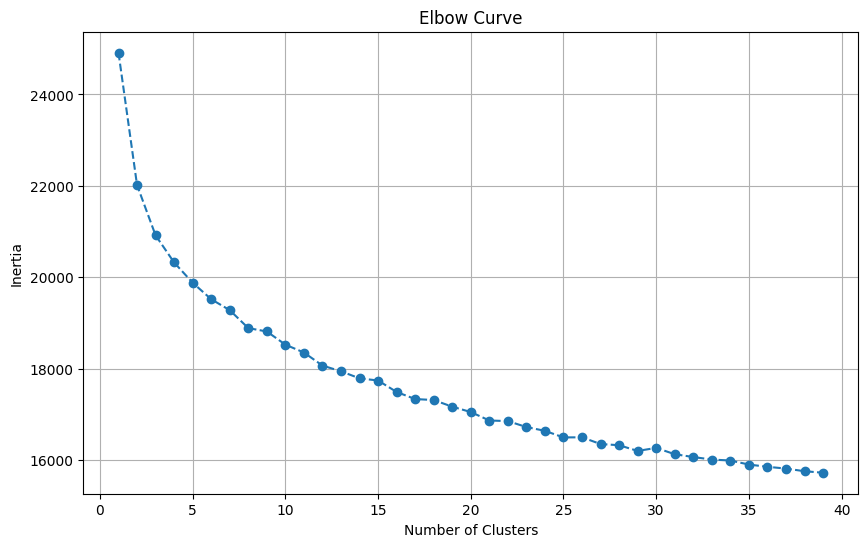

In [76]:
from sklearn.cluster import KMeans

inertia = [] # sum of squared distances between each data point and its closest cluster centroid
cluster_range = range(1, 40)


for cluster_num in cluster_range:

    print(f'Iteration Number: {cluster_num}')

    kmeans = KMeans(n_clusters=cluster_num, n_init=10)
    kmeans.fit(cluster_data2)
    inertia.append(kmeans.inertia_)


draw_elbow_plot(cluster_range, inertia)

In [78]:
kmeans = KMeans(n_clusters=5, n_init=20)
kmeans.fit(cluster_data2)

clustering_data2['cluster'] = kmeans.labels_

clustering_data2.head(10)

,Customer ID,Age,Purchase Amount (USD),Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Gender_Female,Gender_Male,...,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly,cluster
0,1,0.711538,0.4125,0.24,True,True,True,0.265306,False,True,...,False,True,False,False,False,True,False,False,False,1
1,2,0.019231,0.5500,0.24,True,True,True,0.020408,False,True,...,False,False,False,False,False,True,False,False,False,1
2,3,0.615385,0.6625,0.24,True,True,True,0.448980,False,True,...,False,False,False,False,False,False,False,False,True,1
3,4,0.057692,0.8750,0.40,True,True,True,0.979592,False,True,...,True,False,False,False,False,False,False,False,True,3
4,5,0.519231,0.3625,0.08,True,True,True,0.612245,False,True,...,True,False,True,False,False,False,False,False,False,1
5,6,0.538462,0.0000,0.16,True,True,True,0.265306,False,True,...,False,True,False,False,False,False,False,False,True,3
6,7,0.865385,0.8125,0.28,True,True,True,0.979592,False,True,...,False,False,False,False,False,False,False,True,False,1
7,8,0.173077,0.1750,0.28,True,True,True,0.367347,False,True,...,False,False,False,False,False,False,False,False,True,1
8,9,0.153846,0.9625,0.04,True,True,True,0.142857,False,True,...,False,True,True,False,False,False,False,False,False,3
9,10,0.750000,0.1375,0.92,True,True,True,0.061224,False,True,...,False,False,False,False,False,False,False,True,False,3


In [80]:
# add cluster into the reservations data
final_data = data2.merge(clustering_data2[['Customer ID', 'cluster']], on='Customer ID', how='left')
final_data.head(10)

,Customer ID,Age,Gender,Category,Purchase Amount (USD),Location,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,cluster
0,1,55,Male,Clothing,53,Kentucky,Winter,3.1,True,Express,True,True,14,Venmo,Fortnightly,1
1,2,19,Male,Clothing,64,Maine,Winter,3.1,True,Express,True,True,2,Cash,Fortnightly,1
2,3,50,Male,Clothing,73,Massachusetts,Spring,3.1,True,Free Shipping,True,True,23,Credit Card,Weekly,1
3,4,21,Male,Footwear,90,Rhode Island,Spring,3.5,True,Next Day Air,True,True,49,PayPal,Weekly,3
4,5,45,Male,Clothing,49,Oregon,Spring,2.7,True,Free Shipping,True,True,31,PayPal,Annually,1
5,6,46,Male,Footwear,20,Wyoming,Summer,2.9,True,Standard,True,True,14,Venmo,Weekly,3
6,7,63,Male,Clothing,85,Montana,Fall,3.2,True,Free Shipping,True,True,49,Cash,Quarterly,1
7,8,27,Male,Clothing,34,Louisiana,Winter,3.2,True,Free Shipping,True,True,19,Credit Card,Weekly,1
8,9,26,Male,Outerwear,97,West Virginia,Summer,2.6,True,Express,True,True,8,Venmo,Annually,3
9,10,57,Male,Accessories,31,Missouri,Spring,4.8,True,2-Day Shipping,True,True,4,Cash,Quarterly,3


In [81]:
final_data.to_csv('shopping_trends_clustered_data.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import plotly.express as px

In [82]:
final_data = pd.read_csv('/Users/hawkdayeh/Documents/MSBA 2024/BANA 212 Data and Programming Analytics/shopping_trends_clustered_data.csv')

final_data.head()

,Customer ID,Age,Gender,Category,Purchase Amount (USD),Location,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,cluster
0,1,55,Male,Clothing,53,Kentucky,Winter,3.1,True,Express,True,True,14,Venmo,Fortnightly,1
1,2,19,Male,Clothing,64,Maine,Winter,3.1,True,Express,True,True,2,Cash,Fortnightly,1
2,3,50,Male,Clothing,73,Massachusetts,Spring,3.1,True,Free Shipping,True,True,23,Credit Card,Weekly,1
3,4,21,Male,Footwear,90,Rhode Island,Spring,3.5,True,Next Day Air,True,True,49,PayPal,Weekly,3
4,5,45,Male,Clothing,49,Oregon,Spring,2.7,True,Free Shipping,True,True,31,PayPal,Annually,1


In [83]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Category                3900 non-null   object 
 4   Purchase Amount (USD)   3900 non-null   int64  
 5   Location                3900 non-null   object 
 6   Season                  3900 non-null   object 
 7   Review Rating           3900 non-null   float64
 8   Subscription Status     3900 non-null   bool   
 9   Shipping Type           3900 non-null   object 
 10  Discount Applied        3900 non-null   bool   
 11  Promo Code Used         3900 non-null   bool   
 12  Previous Purchases      3900 non-null   int64  
 13  Payment Method          3900 non-null   object 
 14  Frequency of Purchases  3900 non-null   

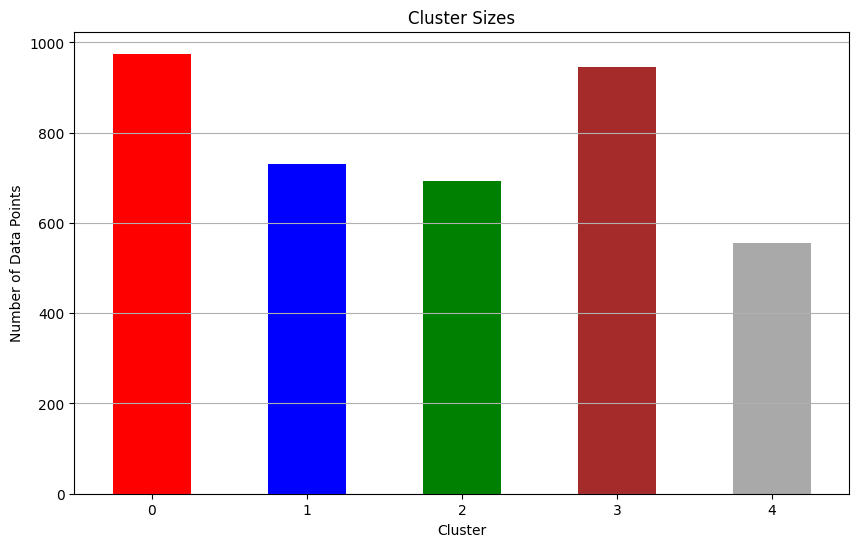

In [84]:
cluster_colors = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'brown',
    4: 'darkgrey'
}


cluster_sizes = final_data['cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
cluster_sizes.plot(kind='bar', color=[cluster_colors[cluster] for cluster in cluster_sizes.index])
# cluster_sizes.plot(kind='bar')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [85]:
print(final_data.dtypes)

Customer ID                 int64
Age                         int64
Gender                     object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Season                     object
Review Rating             float64
Subscription Status          bool
Shipping Type              object
Discount Applied             bool
Promo Code Used              bool
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
cluster                     int64
dtype: object


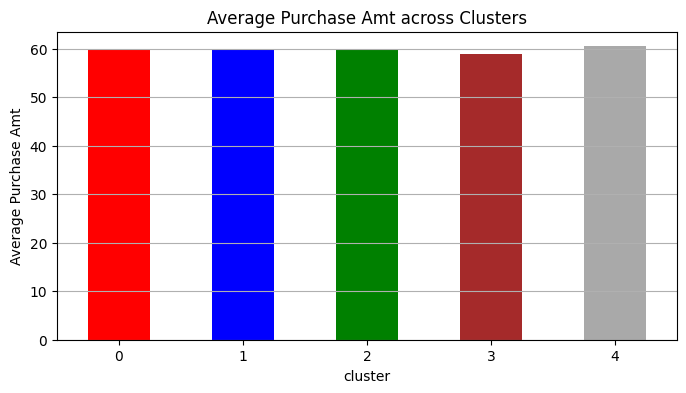

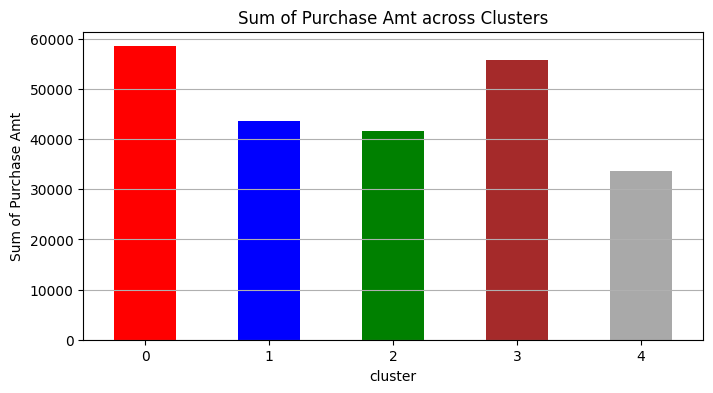

In [86]:
cluster_profiles = final_data.groupby('cluster')['Purchase Amount (USD)'].mean().reset_index()

plt.figure(figsize=(8, 4))
cluster_profiles['Purchase Amount (USD)'].plot(kind='bar', color=[cluster_colors[cluster] for cluster in cluster_profiles.index])
plt.title('Average Purchase Amt across Clusters')
plt.xlabel('cluster')
plt.ylabel('Average Purchase Amt')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()



purchase_amt_cluster = final_data.groupby('cluster')['Purchase Amount (USD)'].sum()

plt.figure(figsize=(8, 4))
purchase_amt_cluster.plot(kind='bar', color=[cluster_colors[cluster] for cluster in purchase_amt_cluster.index])
plt.title('Sum of Purchase Amt across Clusters')
plt.xlabel('cluster')
plt.ylabel('Sum of Purchase Amt')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [87]:
import numpy as np # Importing the numpy library for array operations and mathematical functions
import pandas as pd # Use for exploring the data 
import seaborn as sns # it has also plot
import matplotlib.pyplot as plt # for some extra plot functions
import plotly.express as px # this library can makes interactive plots

In [88]:
final_data['Age_category'] = pd.cut(final_data['Age'], bins= [15, 18 , 30 , 50 , 70] , 
                              labels= ['15-18' , '18-30' ,'30-50','50-70'])

In [89]:
category_order = ['15-18' , '18-30' ,'30-50','50-70']

age_group = final_data.groupby('Age_category')['Age'].count().reset_index()

fig = px.histogram(age_group, y='Age', x='Age_category', category_orders={'Age_category': category_order})
fig.show()

/var/folders/52/_d3mrr310yb1m0msz34c_n7r0000gn/T/ipykernel_12280/4227261844.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group = final_data.groupby('Age_category')['Age'].count().reset_index()


In [90]:
age_group.head()

,Age_category,Age
0,15-18,69
1,18-30,880
2,30-50,1475
3,50-70,1476


In [91]:
#Purchase Amt over Age category
shop_age_group = final_data.groupby('Age_category')['Purchase Amount (USD)'].mean().reset_index()

fig = px.histogram(shop_age_group , y = 'Purchase Amount (USD)' , x = 'Age_category', category_orders={'Age_category': category_order})
fig.show()

/var/folders/52/_d3mrr310yb1m0msz34c_n7r0000gn/T/ipykernel_12280/2213700835.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [92]:
#Overall Gender distribution
fig = px.pie(final_data, names='Gender', color = 'Gender')
fig.show()

In [93]:
gen_count = final_data.groupby('Gender').size().reset_index(name='Count')

gen_count.head()

,Gender,Count
0,Female,1248
1,Male,2652


In [94]:
#Purchase Amt over Gender
shop_group_4 = final_data.groupby('Gender')['Purchase Amount (USD)'].mean().reset_index()
fig = px.histogram(shop_group_4 , y = 'Purchase Amount (USD)' , x = 'Gender')
fig.show()

In [95]:
final_data.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending = False)

Location
Alaska            67.597222
Pennsylvania      66.567568
Arizona           66.553846
West Virginia     63.876543
Nevada            63.379310
Washington        63.328767
North Dakota      62.891566
Virginia          62.883117
Utah              62.577465
Michigan          62.095890
Tennessee         61.974026
New Mexico        61.901235
Rhode Island      61.444444
Texas             61.194805
Arkansas          61.113924
Illinois          61.054348
Mississippi       61.037500
Massachusetts     60.888889
Iowa              60.884058
North Carolina    60.794872
Wyoming           60.690141
South Dakota      60.514286
New York          60.425287
Ohio              60.376623
Montana           60.250000
Idaho             60.075269
Nebraska          59.448276
New Hampshire     59.422535
Alabama           59.112360
California        59.000000
Indiana           58.924051
Georgia           58.797468
South Carolina    58.407895
Oklahoma          58.346667
Missouri          57.913580
Hawaii     

In [96]:
shop_group_2 = final_data.groupby('Location')['Purchase Amount (USD)'].mean().reset_index()

fig = px.bar(shop_group_2, x = 'Location' , y = 'Purchase Amount (USD)')
fig.show()

**Purchase Amount Analysis Methods**

In [89]:
# importing libraries
import seaborn as sns # it has also plot
import matplotlib.pyplot as plt # for some extra plot functions
import plotly.express as px # this library can makes interactive plots

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your data
data = pd.read_csv('/Users/hawkdayeh/Documents/MSBA 2024/BANA 212 Data and Programming Analytics/shopping_trends_updated.csv')

data['Years'] = np.random.randint(2018, 2023, size=len(data))

print(data.head(5))

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ

In [98]:
# Generate dummy variables for seasons
dummy_seasons = pd.get_dummies(data ['Season'], prefix= 'Dummy_Season', dtype=int)
# Concatenate the dummy variables with the original DataFrame

df = pd. concat ([data, dummy_seasons], axis=1)

print(df.head())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  ...  Discount Applied  \
0       Kentucky    L       Gray  Winter  ...               Yes   
1          Maine    L     Maroon  Winter  ...               Yes   
2  Massachusetts    S     Maroon  Spring  ...               Yes   
3   Rhode Island    M     Maroon  Spring  ...               Yes   
4         Oregon    M  Turquoise  Spring  ...               Yes   

  Promo Code Used Previous Purchases Payment Method Frequency of Purchases  \
0             Yes                 14          Venm

In [99]:
# Update 'Frequency of Purchases' to treat "Every 3 Months" as "Quarterly" and "Fortnightly" as "Bi-Weekly"
df['Frequency of Purchases'] = df['Frequency of Purchases'].replace('Every 3 Months', 'Quarterly')
df['Frequency of Purchases'] = df['Frequency of Purchases'].replace('Fortnightly', 'Bi-Weekly')


# Encode the 'Frequency of Purchases' variable with correct ordinal mapping  SHOULD I DO REVERSE ORDINAL SO HIGHER NUMBER MEANS MORE FREQ???
frequency_mapping = {
    "Bi-Weekly": 4,
    "Weekly": 3,
    "Monthly": 2,
    "Quarterly": 1,
    "Annually": 0
}

df['Frequency of Purchases Factored'] = df['Frequency of Purchases'].map(frequency_mapping)

print(df.head(1))

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   

   Location Size Color  Season  ...  Promo Code Used Previous Purchases  \
0  Kentucky    L  Gray  Winter  ...              Yes                 14   

  Payment Method Frequency of Purchases Years  Dummy_Season_Fall  \
0          Venmo              Bi-Weekly  2018                  0   

  Dummy_Season_Spring Dummy_Season_Summer  Dummy_Season_Winter  \
0                   0                   0                    1   

   Frequency of Purchases Factored  
0                                4  

[1 rows x 24 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

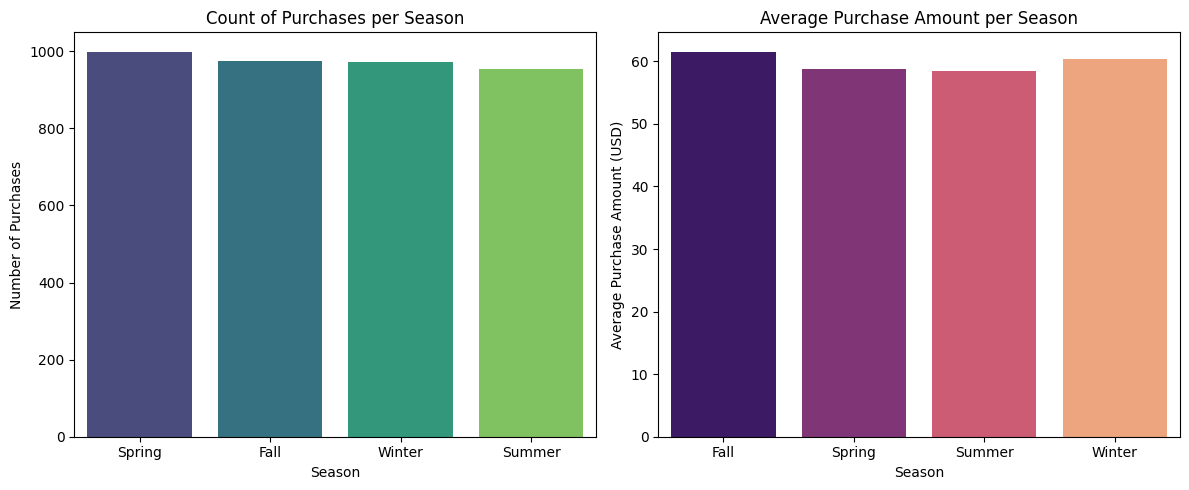

(Season
 Spring    999
 Fall      975
 Winter    971
 Summer    955
 Name: count, dtype: int64,
 Season
 Fall      61.556923
 Spring    58.737738
 Summer    58.405236
 Winter    60.357364
 Name: Purchase Amount (USD), dtype: float64)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seasonal Analysis
# Count of purchases per season
seasonal_count = data['Season'].value_counts()

# Average purchase amount per season
seasonal_avg_purchase = data.groupby('Season')['Purchase Amount (USD)'].mean()

# Plotting the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=seasonal_count.index, y=seasonal_count.values, palette="viridis")
plt.title("Count of Purchases per Season")
plt.xlabel("Season")
plt.ylabel("Number of Purchases")

plt.subplot(1, 2, 2)
sns.barplot(x=seasonal_avg_purchase.index, y=seasonal_avg_purchase.values, palette="magma")
plt.title("Average Purchase Amount per Season")
plt.xlabel("Season")
plt.ylabel("Average Purchase Amount (USD)")

plt.tight_layout()
plt.show()

# Displaying the results
seasonal_count, seasonal_avg_purchase


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

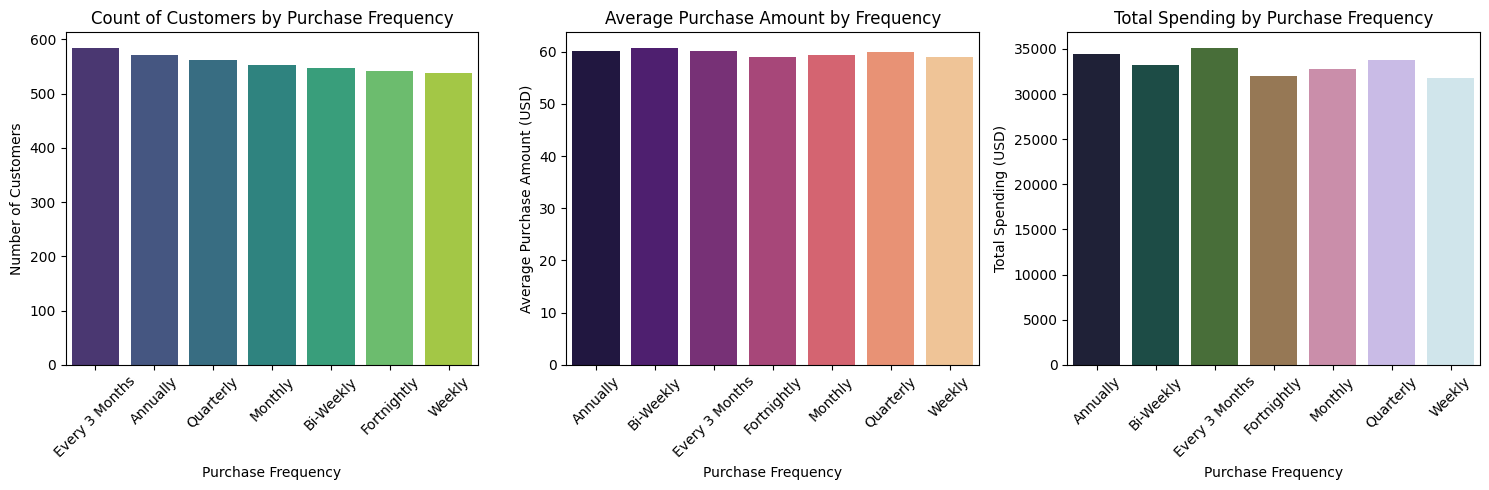

(Frequency of Purchases
 Every 3 Months    584
 Annually          572
 Quarterly         563
 Monthly           553
 Bi-Weekly         547
 Fortnightly       542
 Weekly            539
 Name: count, dtype: int64,
 Frequency of Purchases
 Annually          60.173077
 Bi-Weekly         60.694698
 Every 3 Months    60.082192
 Fortnightly       59.053506
 Monthly           59.330922
 Quarterly         59.984014
 Weekly            58.972171
 Name: Purchase Amount (USD), dtype: float64,
 Frequency of Purchases
 Annually          34419
 Bi-Weekly         33200
 Every 3 Months    35088
 Fortnightly       32007
 Monthly           32810
 Quarterly         33771
 Weekly            31786
 Name: Purchase Amount (USD), dtype: int64)

In [4]:
# Purchase Frequency Analysis
# Count of customers by purchase frequency
frequency_count = data['Frequency of Purchases'].value_counts()

# Average purchase amount by purchase frequency
frequency_avg_purchase = data.groupby('Frequency of Purchases')['Purchase Amount (USD)'].mean()

# Total spending by purchase frequency
frequency_total_spending = data.groupby('Frequency of Purchases')['Purchase Amount (USD)'].sum()

# Plotting the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x=frequency_count.index, y=frequency_count.values, palette="viridis")
plt.title("Count of Customers by Purchase Frequency")
plt.xlabel("Purchase Frequency")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.barplot(x=frequency_avg_purchase.index, y=frequency_avg_purchase.values, palette="magma")
plt.title("Average Purchase Amount by Frequency")
plt.xlabel("Purchase Frequency")
plt.ylabel("Average Purchase Amount (USD)")
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.barplot(x=frequency_total_spending.index, y=frequency_total_spending.values, palette="cubehelix")
plt.title("Total Spending by Purchase Frequency")
plt.xlabel("Purchase Frequency")
plt.ylabel("Total Spending (USD)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Displaying the results
frequency_count, frequency_avg_purchase, frequency_total_spending


In [100]:
import pandas as pd
import statsmodels.api as sm

# Assuming you have a DataFrame named 'data' with columns: 'purchase_amount', 'seasons', 'purchase_frequency', 'previous_purchases'
# Replace 'data' with your actual DataFrame name and columns

# Define independent variables and the dependent variable
X = df[['Dummy_Season_Fall', 'Dummy_Season_Spring', 'Dummy_Season_Summer', 'Dummy_Season_Winter', 'Frequency of Purchases Factored','Previous Purchases']]
y = df['Purchase Amount (USD)']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())



                              OLS Regression Results                             
Dep. Variable:     Purchase Amount (USD)   R-squared:                       0.003
Model:                               OLS   Adj. R-squared:                  0.002
Method:                    Least Squares   F-statistic:                     2.334
Date:                   Wed, 06 Dec 2023   Prob (F-statistic):             0.0398
Time:                           20:10:44   Log-Likelihood:                -17870.
No. Observations:                   3900   AIC:                         3.575e+04
Df Residuals:                       3894   BIC:                         3.579e+04
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [105]:
import pandas as pd
import statsmodels.api as sm

# Assuming you have a DataFrame named 'data' with columns: 'purchase_amount', 'seasons', 'purchase_frequency', 'previous_purchases'
# Replace 'data' with your actual DataFrame name and columns

# Define independent variables and the dependent variable
X = df[['Frequency of Purchases Factored','Previous Purchases']]
y = df['Purchase Amount (USD)']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())



                              OLS Regression Results                             
Dep. Variable:     Purchase Amount (USD)   R-squared:                       0.000
Model:                               OLS   Adj. R-squared:                 -0.000
Method:                    Least Squares   F-statistic:                    0.2246
Date:                   Thu, 07 Dec 2023   Prob (F-statistic):              0.799
Time:                           10:16:01   Log-Likelihood:                -17876.
No. Observations:                   3900   AIC:                         3.576e+04
Df Residuals:                       3897   BIC:                         3.578e+04
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [101]:
import pandas as pd
import statsmodels.api as sm

In [115]:
# Assuming you have a DataFrame named 'data' with columns: 'purchase_amount', 'seasons', 'purchase_frequency', 'previous_purchases'
# Replace 'data' with your actual DataFrame name and columns

# Define a threshold for purchase amount to create binary outcomes
threshold_amount = 20  # Set your threshold here

# Create a binary column indicating whether purchase amount exceeds the threshold
df['Purchase_Exceeds_Threshold'] = (df['Purchase Amount (USD)'] > threshold_amount).astype(int)

# Define independent variables and the dependent variable
X = df[['Dummy_Season_Fall', 'Dummy_Season_Spring', 'Dummy_Season_Summer', 'Dummy_Season_Winter', 'Frequency of Purchases Factored', 'Previous Purchases']]
y = df['Purchase_Exceeds_Threshold']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the summary of the logistic regression model
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.068990
         Iterations 9
                               Logit Regression Results                               
Dep. Variable:     Purchase_Exceeds_Threshold   No. Observations:                 3900
Model:                                  Logit   Df Residuals:                     3893
Method:                                   MLE   Df Model:                            6
Date:                        Thu, 07 Dec 2023   Pseudo R-squ.:                 0.02571
Time:                                10:36:02   Log-Likelihood:                -269.06
converged:                               True   LL-Null:                       -276.16
Covariance Type:                    nonrobust   LLR p-value:                   0.02747
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
co

In [116]:
# Assuming you have a DataFrame named 'data' with columns: 'purchase_amount', 'seasons', 'purchase_frequency', 'previous_purchases'
# Replace 'data' with your actual DataFrame name and columns

# Define a threshold for purchase amount to create binary outcomes
threshold_amount = 20  # Set your threshold here

# Create a binary column indicating whether purchase amount exceeds the threshold
df['Purchase_Exceeds_Threshold'] = (df['Purchase Amount (USD)'] > threshold_amount).astype(int)

# Define independent variables and the dependent variable
X = df[['Frequency of Purchases Factored', 'Previous Purchases']]
y = df['Purchase_Exceeds_Threshold']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the summary of the logistic regression model
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.070592
         Iterations 8
                               Logit Regression Results                               
Dep. Variable:     Purchase_Exceeds_Threshold   No. Observations:                 3900
Model:                                  Logit   Df Residuals:                     3897
Method:                                   MLE   Df Model:                            2
Date:                        Thu, 07 Dec 2023   Pseudo R-squ.:                0.003087
Time:                                10:37:41   Log-Likelihood:                -275.31
converged:                               True   LL-Null:                       -276.16
Covariance Type:                    nonrobust   LLR p-value:                    0.4263
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
co

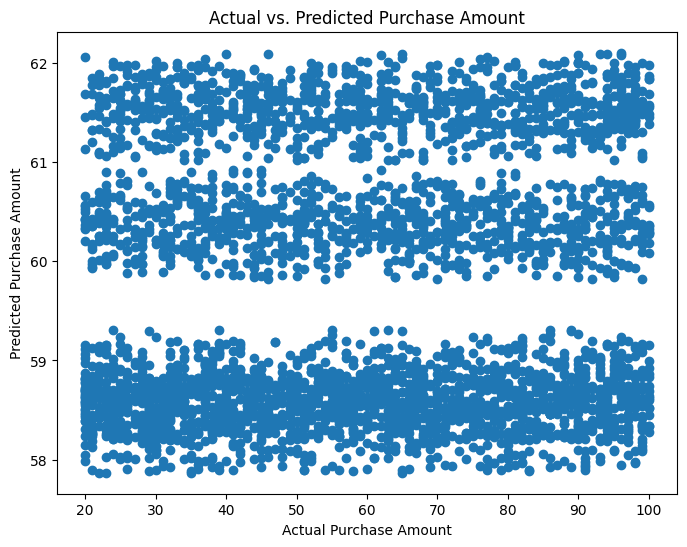

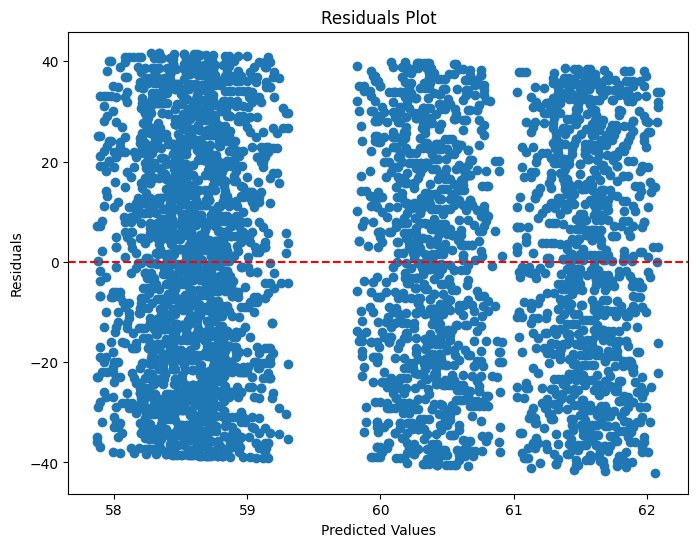

In [11]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Calculate predicted values
predicted_values = model.predict(X)

# Plot predicted values vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y, predicted_values)
plt.xlabel('Actual Purchase Amount')
plt.ylabel('Predicted Purchase Amount')
plt.title('Actual vs. Predicted Purchase Amount')
plt.show()

# Plot residuals
residuals = model.resid
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()

# Other diagnostic plots can be generated to check assumptions and model performance


In [51]:
df['Age_category'] = pd.cut(df['Age'], bins= [0,15, 18 , 30 , 50 , 70] , labels= ['child' , 'teen' , 'Young Adults' ,'Middle-Aged Adults','Senior'])
df['Age_category'].unique()
shop_group = df.groupby('Frequency of Purchases')['Age'].sum()
px.sunburst(df , path=['Frequency of Purchases','Age_category'] , values='Age')
px.sunburst(df , path=['Frequency of Purchases','Age_category'] , values='Age')
#Seniors have a lot of disposable income and buy presents for children and grandchildren